In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib notebook

In [3]:
df = pd.read_csv('SON_egypt_male_hashtag_trans_table.csv',sep=',',encoding="utf-8")
df

,Id,Label,timeset,Eccentricity,closnesscentrality,harmonicclosnesscentrality,betweenesscentrality,modularity_class,pageranks,eigencentrality,Degree,Weighted Degree,Authority,Hub
0,#tameemyounes,#tameemyounes,NaN,1,1,1,0,0,0.465048,1,1,1,0.707107,0.707107
1,#salmonella,#salmonella,NaN,1,1,1,0,0,0.465048,1,1,1,0.707107,0.707107
2,#TameemYounes,#TameemYounes,NaN,0,0,0,0,1,0.069904,0,0,0,0.000000,0.000000


<IPython.core.display.Javascript object>


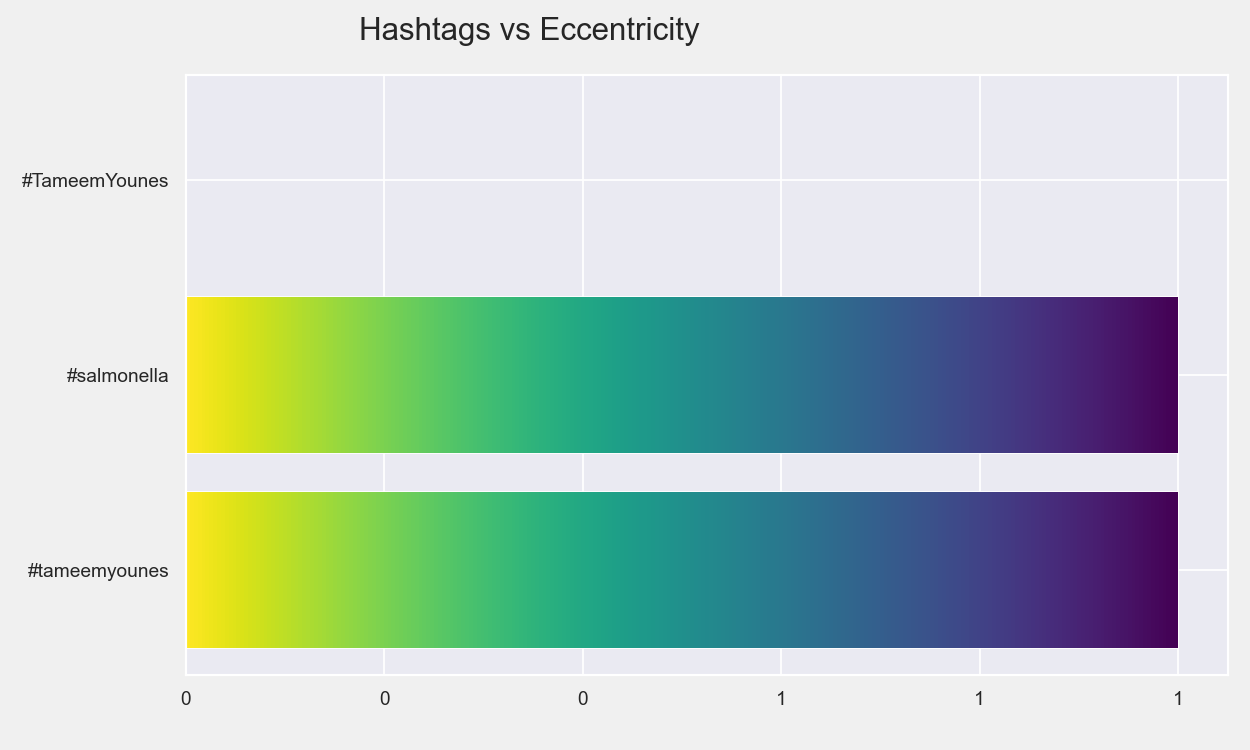

<ipython-input-4-28fb13ea6d76>:63: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)


<IPython.core.display.Javascript object>


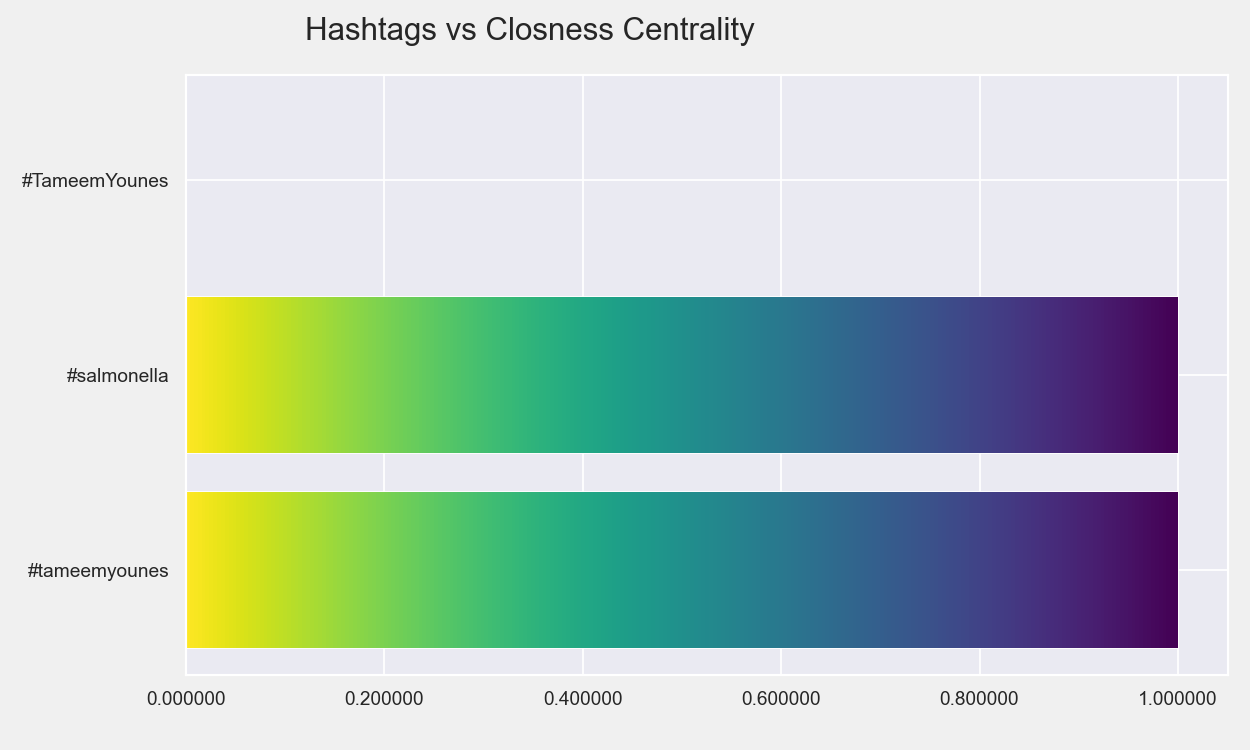

<IPython.core.display.Javascript object>


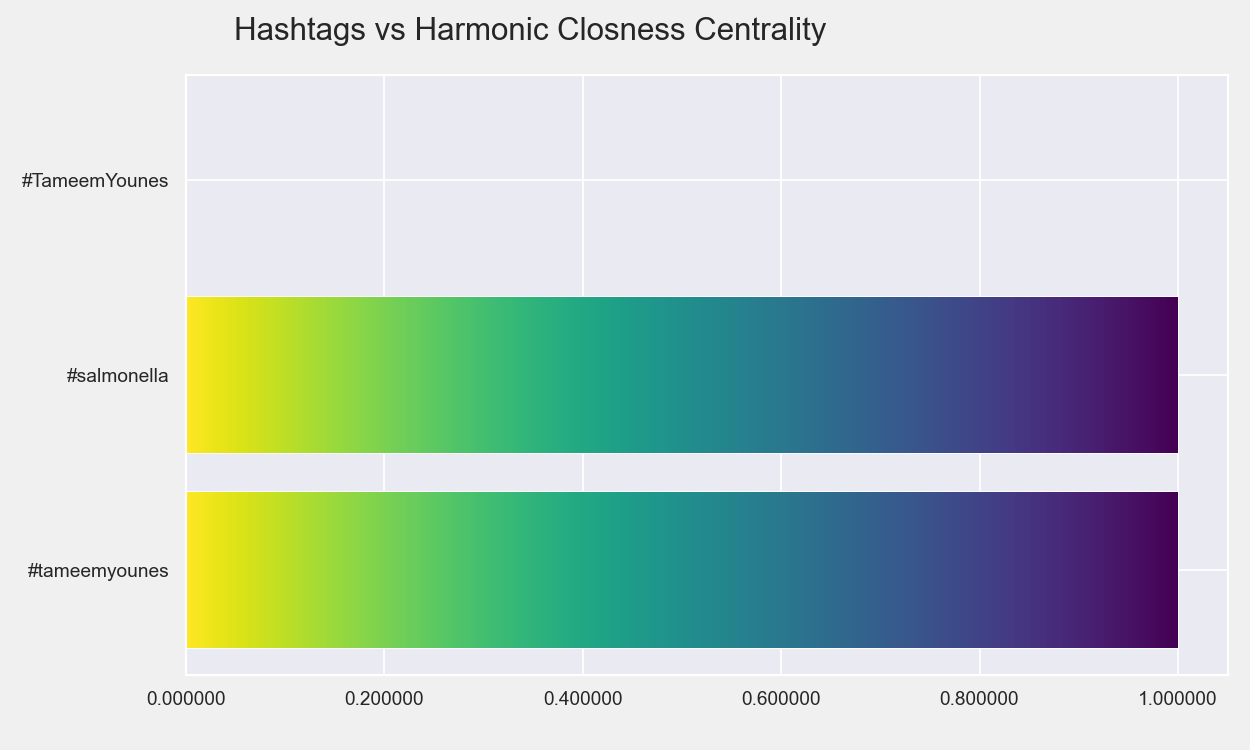

<IPython.core.display.Javascript object>


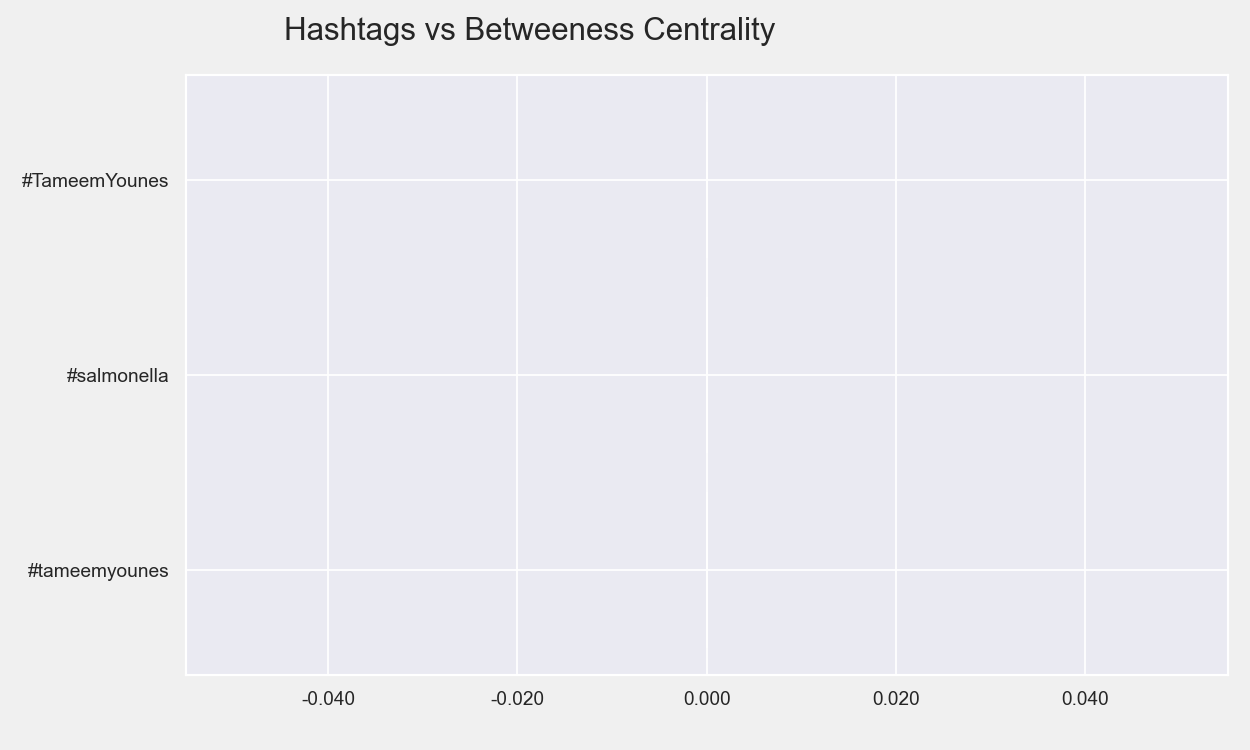

<IPython.core.display.Javascript object>


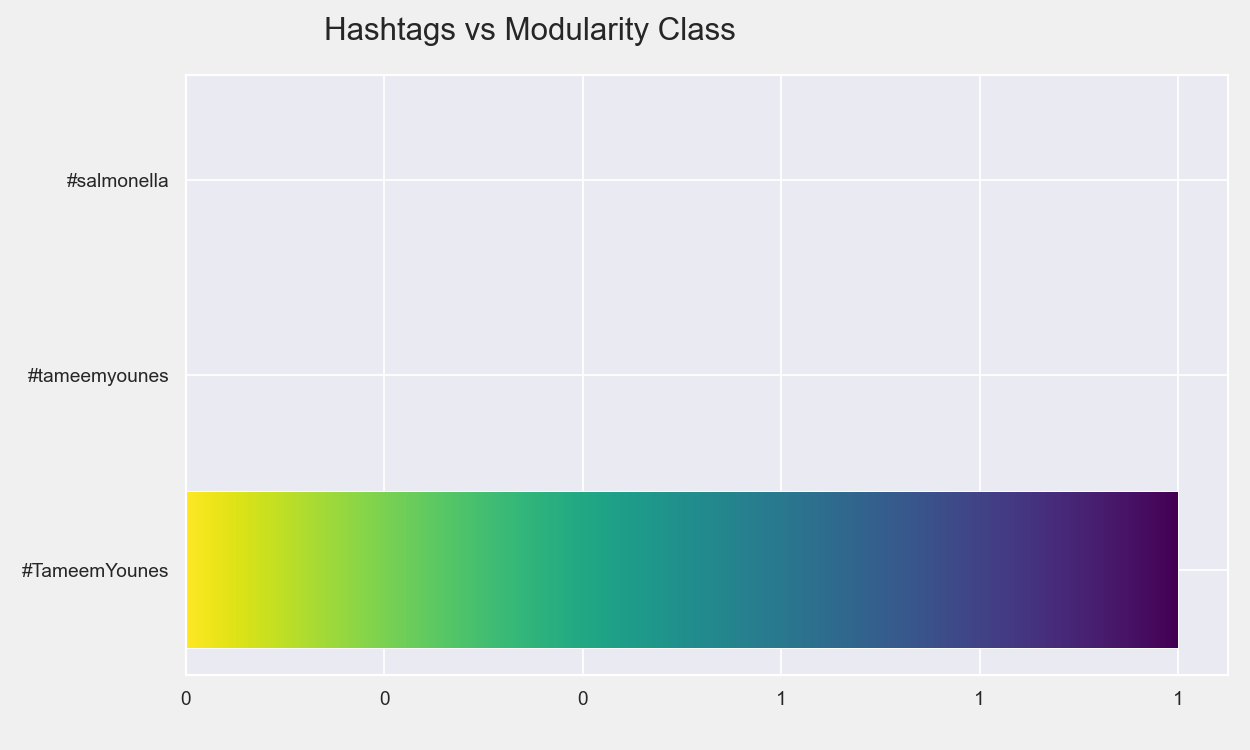

<IPython.core.display.Javascript object>


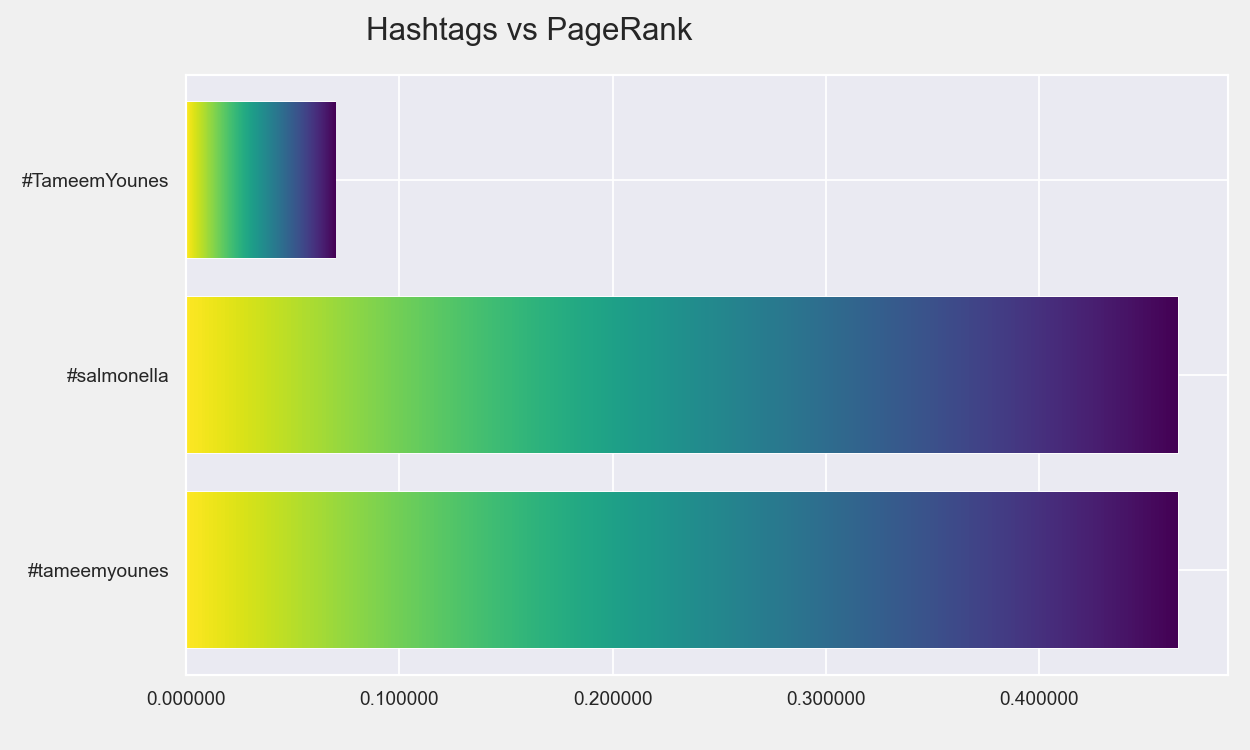

<IPython.core.display.Javascript object>


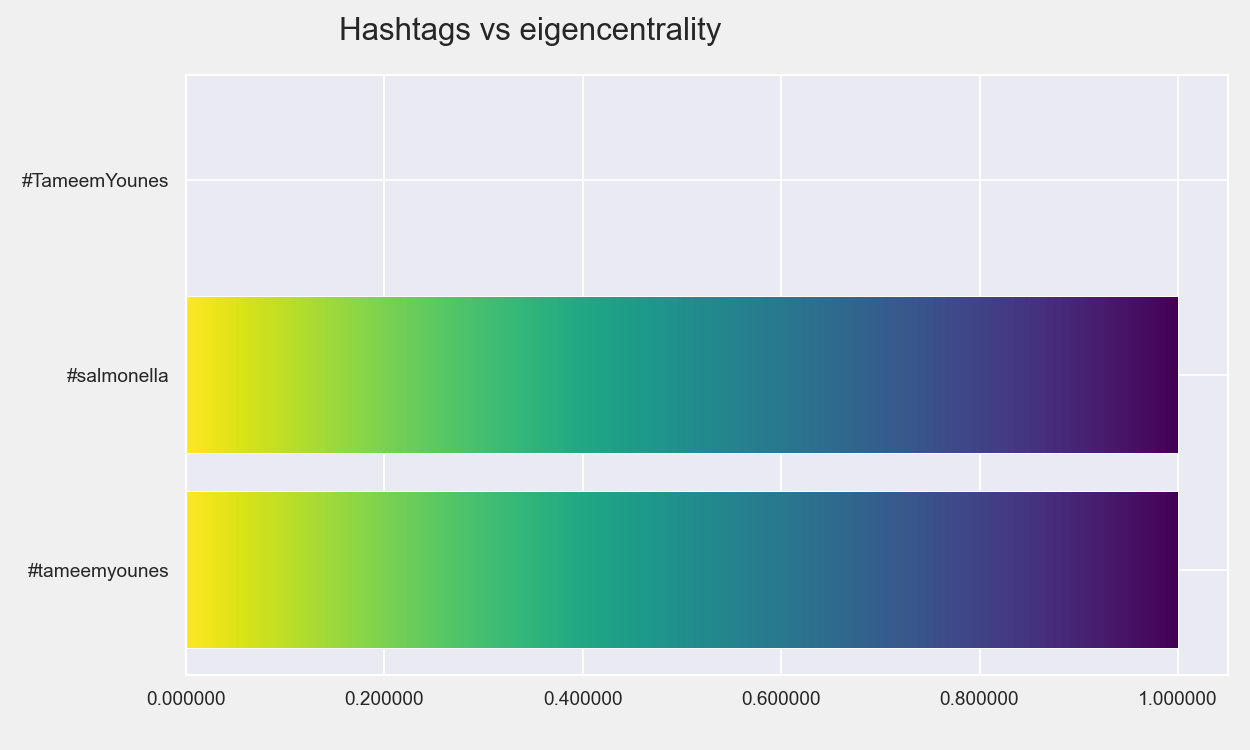

<IPython.core.display.Javascript object>


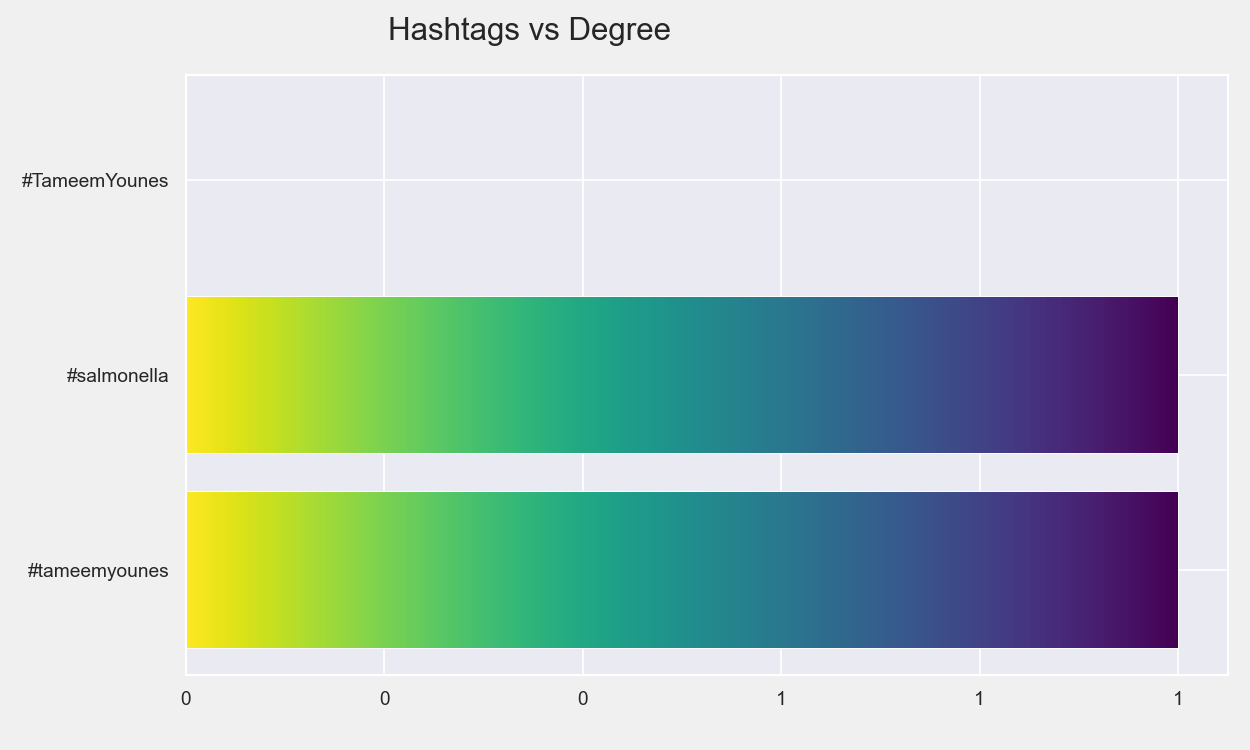

<IPython.core.display.Javascript object>


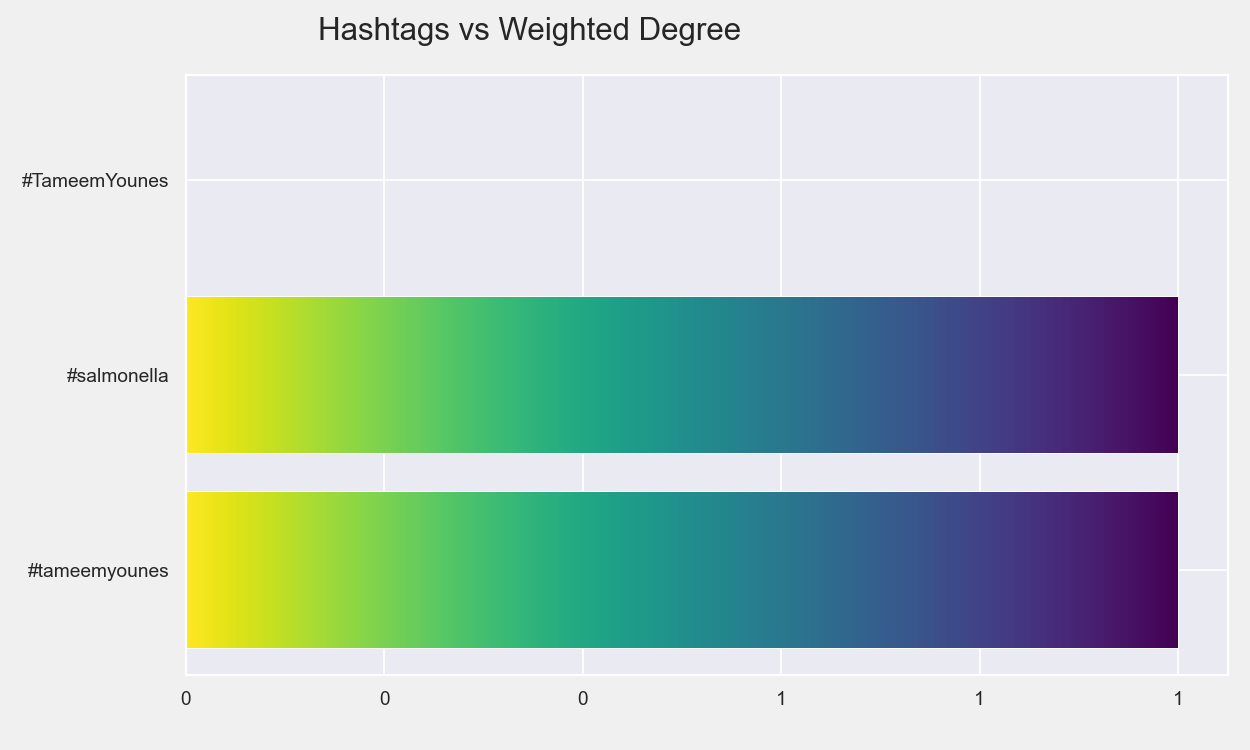

<IPython.core.display.Javascript object>


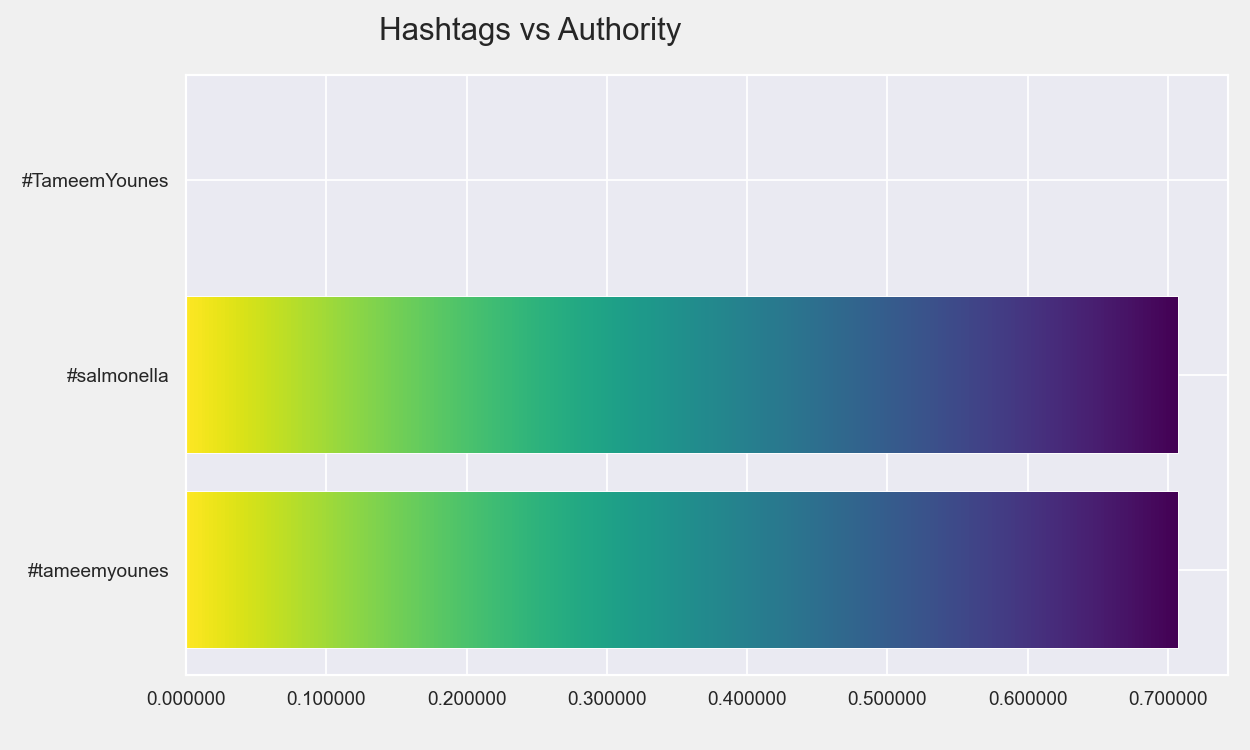

<ipython-input-4-28fb13ea6d76>:63: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)


<IPython.core.display.Javascript object>


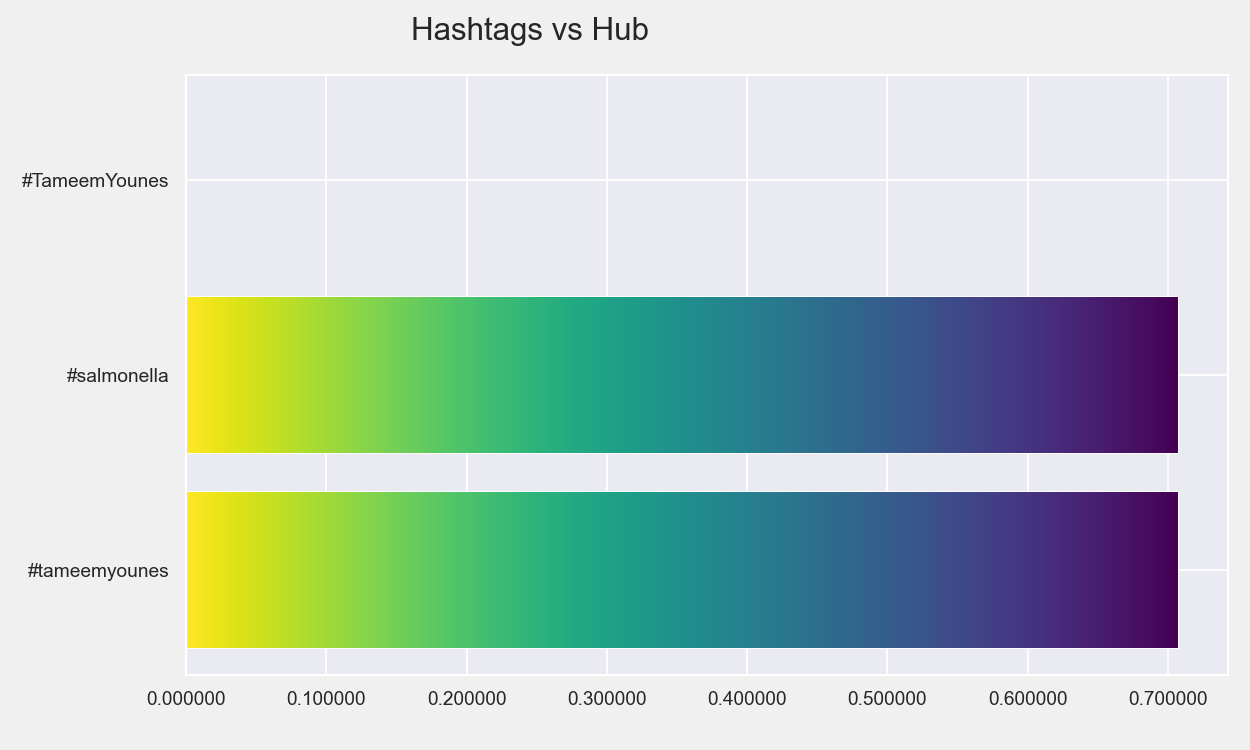

In [4]:
column_names =  list(df.columns)
column_names = column_names[3:]

for i in column_names:
    if i == 'closnesscentrality':
        title_variable = 'Closness Centrality'
    elif i == 'harmonicclosnesscentrality':
        title_variable = 'Harmonic Closness Centrality'
    elif i == 'betweenesscentrality':
        title_variable = 'Betweeness Centrality'
    elif i == 'modularity_class':
        title_variable = 'Modularity Class'    
    elif i == 'pageranks':
        title_variable = 'PageRank' 
    else:
        title_variable = i
    selected_variable = i

    df = df.sort_values(selected_variable,ascending = False).head(20)

    # Variables
    index = df['Id']
    values = df[selected_variable]
    plot_title = 'Hashtags vs ' + title_variable
    title_size = 18
    x_label = title_variable
    filename = selected_variable
    fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
    mpl.pyplot.viridis()


    bar = ax.barh(index, values)
    plt.tight_layout()
    
    if i == 'modularity_class':
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    elif i == 'Degree':
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    elif i == 'Weighted Degree':
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    elif i == 'Eccentricity':
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    elif i == 'betweenesscentrality':
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.3f}'))
    else:
        ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.6f}'))

    title = plt.title(plot_title, pad=20, fontsize=title_size)
    title.set_position([.33, 1])
    plt.subplots_adjust(top=0.9, bottom=0.1)

    ax.grid(zorder=0)

    def gradientbars(bars):
        grad = np.atleast_2d(np.linspace(0,1,256))
        ax = bars[0].axes
        lim = ax.get_xlim()+ax.get_ylim()
        for bar in bars:
            bar.set_zorder(1)
            bar.set_facecolor('none')
            x,y = bar.get_xy()
            w, h = bar.get_width(), bar.get_height()
            ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
        ax.axis(lim)
    gradientbars(bar)
    #plt.savefig(filename+'.png', facecolor=(.94, .94, .94))  saves the plots